# Import library

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [8]:
sns.set(style = "whitegrid",
        rc = {'figure.figsize':(10,6)}
       )

# Descriptive statistics

2.1 S&P500

In [36]:
sp500 = yf.download("^GSPC")
sp500.reset_index(inplace=True)
sp500.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
23956,2023-05-15,4126.649902,4141.250000,4110.270020,4136.279785,4136.279785,3562170000
23957,2023-05-16,4127.950195,4135.540039,4109.859863,4109.899902,4109.899902,3654200000
23958,2023-05-17,4122.850098,4164.669922,4113.620117,4158.770020,4158.770020,4039080000
23959,2023-05-18,4157.680176,4202.200195,4153.500000,4198.049805,4198.049805,3980500000
23960,2023-05-19,4204.149902,4212.910156,4180.200195,4191.979980,4191.979980,4041900000


In [37]:
sp500.shape

(23961, 7)

In [38]:
sp500.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,2.396100e+04
mean,563.796349,587.354202,580.125009,583.970153,583.970153,8.685784e+08
std,938.625026,932.726617,921.504433,927.475231,927.475231,1.590741e+09
min,0.000000,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,9.540000,24.430000,24.430000,24.430000,24.430000,1.440000e+06
50%,40.650002,102.150002,100.550003,101.309998,101.309998,1.915000e+07
75%,957.280029,968.650024,950.549988,957.590027,957.590027,8.108000e+08
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


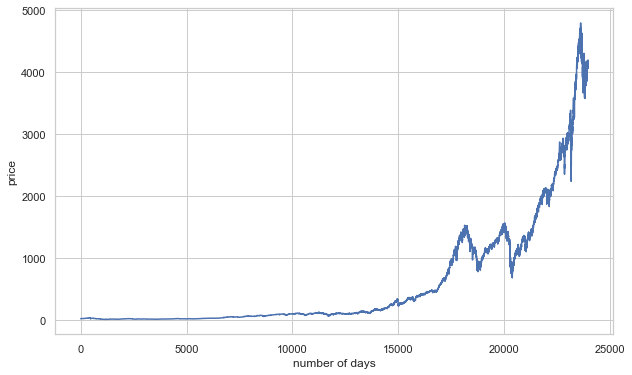

In [44]:
#Plot the data of S&P500
sp500['Adj Close'].plot()
plt.xlabel("number of days")
plt.ylabel("price")
plt.show()

In [245]:
#New table from wiki to see what sectors are in index
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]

In [246]:
df = first_table
print(df.shape)
df["Symbol"] = df["Symbol"].map(lambda x: x.replace(".", "-")) 
sp500_tickers = list(df["Symbol"])
df.head()

(503, 8)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [247]:
sector_count = df.groupby('GICS Sector')\
.agg({'Symbol':"count"})\
.sort_values('Symbol', ascending=False)\
.reset_index()

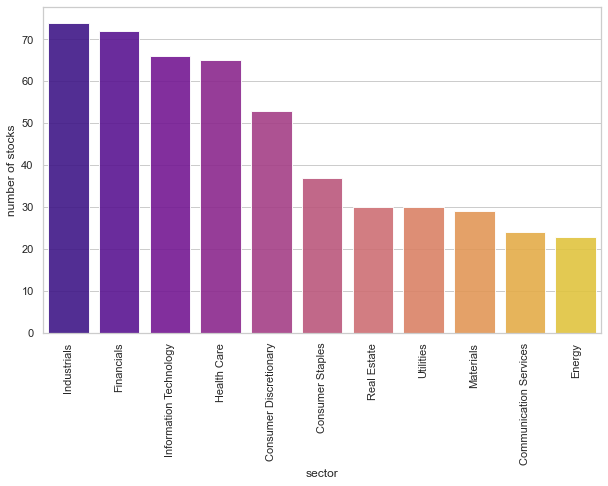

In [248]:
sns.barplot(data=sector_count,x='GICS Sector', y='Symbol',  
               palette="plasma", alpha=0.9)
plt.xlabel("sector")
plt.ylabel("number of stocks")
plt.xticks(rotation=90);

Mean daily return: 0.000299577081792182
Median daily return: 0.00047974227692992866
Standard deviation of daily returns: 0.011991375174770532


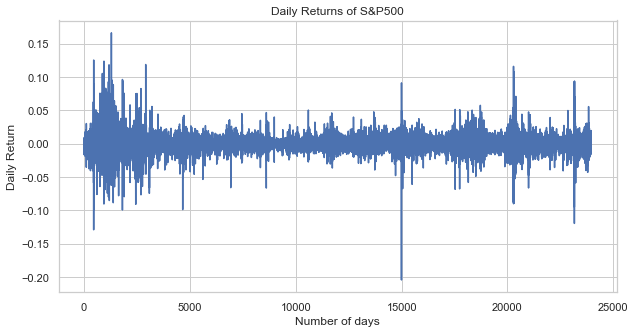

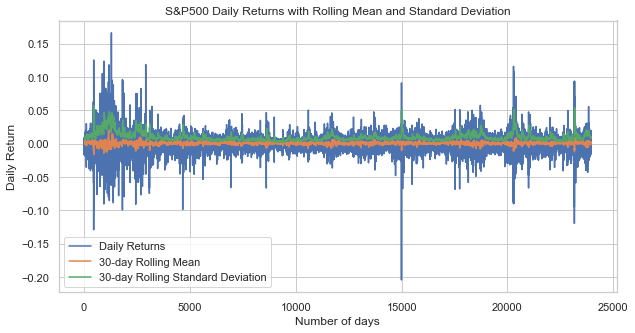

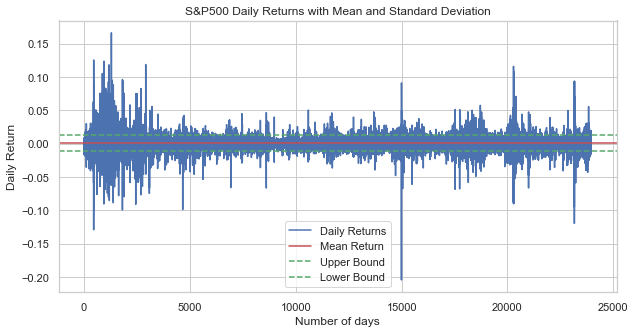

In [249]:
# Calculate daily returns
sp500_returns = sp500['Adj Close'].pct_change()

# Calculate descriptive statistics
mean_return = sp500_returns.mean()
median_return = sp500_returns.median()
std_dev = sp500_returns.std()

print("Mean daily return:", mean_return)
print("Median daily return:", median_return)
print("Standard deviation of daily returns:", std_dev)

# Visualize daily returns
plt.figure(figsize=(10,5))
plt.plot(sp500_returns.index, sp500_returns)
plt.title('Daily Returns of S&P500')
plt.xlabel('Number of days')
plt.ylabel('Daily Return')
plt.show()

# Visualize rolling mean and standard deviation
window = 30
rolling_mean = sp500_returns.rolling(window=window).mean()
rolling_std_dev = sp500_returns.rolling(window=window).std()
plt.figure(figsize=(10,5))
plt.plot(sp500_returns.index, sp500_returns, label='Daily Returns')
plt.plot(rolling_mean.index, rolling_mean, label=f'{window}-day Rolling Mean')
plt.plot(rolling_std_dev.index, rolling_std_dev, label=f'{window}-day Rolling Standard Deviation')
plt.legend()
plt.title('S&P500 Daily Returns with Rolling Mean and Standard Deviation')
plt.xlabel('Number of days')
plt.ylabel('Daily Return')
plt.show()

# Visualize daily returns with mean and standard deviation
plt.figure(figsize=(10,5))
plt.plot(sp500_returns.index, sp500_returns, label='Daily Returns')
plt.axhline(y=mean_return, color='r', label='Mean Return')
plt.axhline(y=mean_return+std_dev, color='g', linestyle='--', label='Upper Bound')
plt.axhline(y=mean_return-std_dev, color='g', linestyle='--', label='Lower Bound')
plt.legend()
plt.title('S&P500 Daily Returns with Mean and Standard Deviation')
plt.xlabel('Number of days')
plt.ylabel('Daily Return')
plt.show()

2.2 Unemployment Rate

In [250]:
unemployment_df = pd.read_csv(r'C:\Users\User\Desktop\курсова\USUnemployment.csv')
unemployment_df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
67,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
68,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
69,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
70,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
71,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [251]:
def monthToNum(shortMonth):
    return{'Jan' : 1,
            'Feb' : 2,
            'Mar' : 3,
            'Apr' : 4,
            'May' : 5,
            'Jun' : 6,
            'Jul' : 7,
            'Aug' : 8,
            'Sep' : 9, 
            'Oct' : 10,
            'Nov' : 11,
            'Dec' : 12
    }[shortMonth]

monthToNum('Feb')

unemployment_df = (unemployment_df.set_index(['Year'])
                   .stack()
                   .reset_index(name='Unemployment')
                   .rename(columns={'level_1':'Month' }))
        
unemployment_df['Month'] = [monthToNum(m) for m in unemployment_df['Month'].values ]
unemployment_df.head()

,Year,Month,Unemployment
0,1948,1,3.4
1,1948,2,3.8
2,1948,3,4.0
3,1948,4,3.9
4,1948,5,3.5


In [252]:
unemployment_df['Date'] = [str(y) + '-' + str(m) + '-' + '01' for y,m in zip(unemployment_df['Year'].values, unemployment_df['Month'].values)]
unemployment_df = unemployment_df[['Date','Unemployment']]
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df.tail()

,Date,Unemployment
859,2019-08-01,3.7
860,2019-09-01,3.5
861,2019-10-01,3.6
862,2019-11-01,3.5
863,2019-12-01,3.5


In [253]:
unemployment_df.describe()

,Unemployment
count,864.000000
mean,5.733796
std,1.645568
min,2.500000
25%,4.500000
50%,5.550000
75%,6.800000
max,10.800000


In [254]:
unmp_value = unemployment_df['Unemployment']

# Calculate descriptive statistics
mean_return = unmp_value.mean()
median_return = unmp_value.median()
std_dev = unmp_value.std()

print("Mean unemployment rate:", mean_return)
print("Median unemployment rate:", median_return)
print("Standard unemployment rate:", std_dev)


Mean unemployment rate: 5.733796296296297
Median unemployment rate: 5.55
Standard unemployment rate: 1.645568207504101


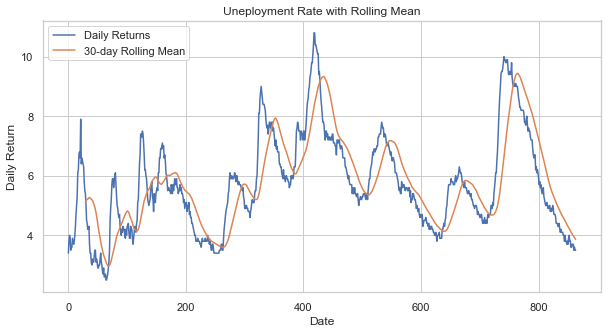

In [255]:
window = 30
rolling_mean = unmp_value.rolling(window=window).mean()
rolling_std_dev = unmp_value.rolling(window=window).std()

plt.figure(figsize=(10,5))
plt.plot(unmp_value.index, unmp_value, label='Daily Returns')
plt.plot(rolling_mean.index, rolling_mean, label=f'{window}-day Rolling Mean')
plt.legend()
plt.title('Uneployment Rate with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

# Сorrelation

# 1.Unemployment Rate

In [256]:
sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23952,2023-05-09,4124.250000,4130.350098,4116.649902,4119.169922,4119.169922,3810140000
23953,2023-05-10,4143.740234,4154.279785,4098.919922,4137.640137,4137.640137,4057160000
23954,2023-05-11,4132.240234,4132.799805,4109.290039,4130.620117,4130.620117,3752900000
23955,2023-05-12,4138.540039,4143.740234,4099.120117,4124.080078,4124.080078,3533740000
23956,2023-05-15,4126.649902,4130.450195,4110.270020,4111.120117,4111.120117,332815461


In [257]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500[['Date', 'Adj Close']]
sp500.rename(columns={'Adj Close':'Adj_Close'})
sp500.columns = ['Date', 'SP500_Value']
sp500['SP500_pct_change'] = sp500['SP500_Value'].pct_change()

sp500.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1848\4161735431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['SP500_pct_change'] = sp500['SP500_Value'].pct_change()


,Date,SP500_Value,SP500_pct_change
0,1927-12-30,17.660000,NaN
1,1928-01-03,17.760000,0.005663
2,1928-01-04,17.719999,-0.002252
3,1928-01-05,17.549999,-0.009594
4,1928-01-06,17.660000,0.006268


In [258]:
sp500.isna().sum()

Date                0
SP500_Value         0
SP500_pct_change    1
dtype: int64

Let's look at their graphs

<AxesSubplot:xlabel='Date', ylabel='SP500_Value'>

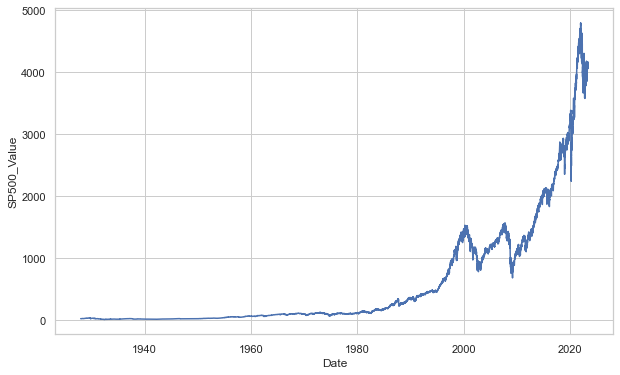

In [259]:
sns.lineplot(data=sp500, x=sp500['Date'], y=sp500['SP500_Value'],color='b')

<AxesSubplot:xlabel='Date', ylabel='Unemployment'>

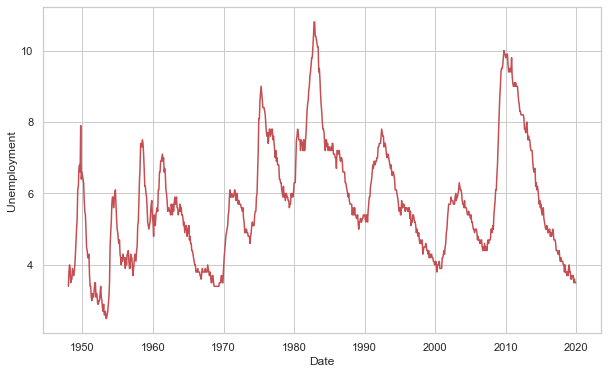

In [260]:
sns.lineplot(data=unemployment_df, x=unemployment_df['Date'], y=unemployment_df['Unemployment'],color='r')

Selecting the desired dates

In [261]:
# date range available
print('unemployment_df:', np.min(unemployment_df['Date']), np.max(unemployment_df['Date']))
print('SP500:', np.min(sp500['Date']), np.max(sp500['Date']))

unemployment_df: 1948-01-01 00:00:00 2019-12-01 00:00:00
SP500: 1927-12-30 00:00:00 2023-05-15 00:00:00


In [262]:
cut_off_date = '1980-01-03' 
cut_off_date_2 = '2019-12-01'

sp500 = sp500[sp500['Date'] >= cut_off_date]
sp500 = sp500[sp500['Date'] <= cut_off_date_2]
unemployment_df = unemployment_df[unemployment_df['Date'] >= cut_off_date]
 
print('S&P500_df.shape:',sp500.shape)
print('Unemployment_df.shape:',unemployment_df.shape)

S&P500_df.shape: (10065, 3)
Unemployment_df.shape: (479, 2)


And project them on one graph with two axes. Also look at the numbers and the scatterplot

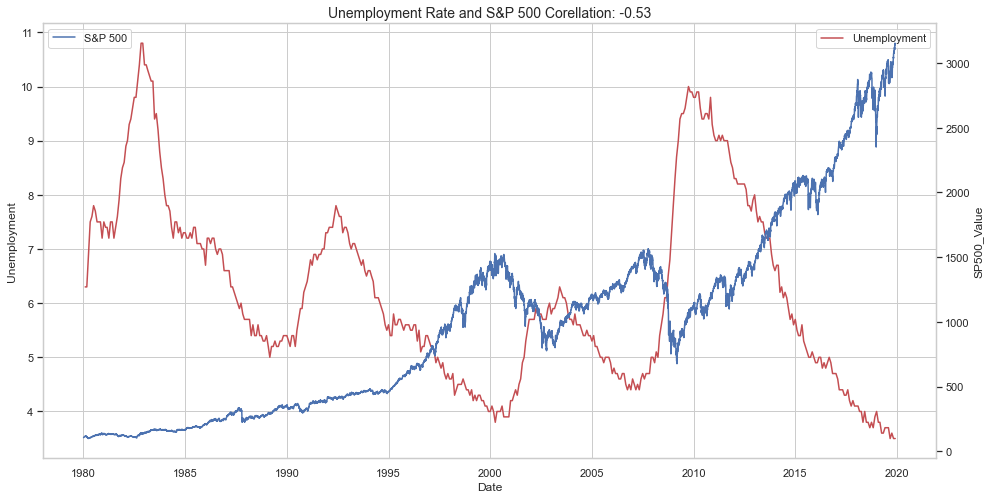

In [263]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.lineplot(data=unemployment_df, x=unemployment_df['Date'], 
                  y=unemployment_df['Unemployment'], color='r',label='Unemployment')

ax2 = plt.twinx()
sns.lineplot(ax=ax2, data=sp500, x=sp500['Date'], 
             y=sp500.SP500_Value, color="b",label='S&P 500')
plt.title(f"Unemployment Rate and S&P 500 Corellation: {correlation_unem}", fontsize=14)
plt.grid();

In [264]:
sp500 = yf.download('^GSPC')
sp500.reset_index(inplace=True)
sp500['Date'] = pd.to_datetime(sp500['Date'])


[*********************100%***********************]  1 of 1 completed


In [265]:
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

In [266]:
cut_off_date = '1980-01-01' 
cut_off_date_2 = '2019-12-01'

sp500 = sp500[sp500['Date'] >= cut_off_date]
sp500 = sp500[sp500['Date'] <= cut_off_date_2]
unemployment_df = unemployment_df[unemployment_df['Date'] >= cut_off_date]

unemployment_df.set_index('Date', inplace=True)
sp500.set_index('Date', inplace=True)

In [267]:
merged_df = pd.merge(sp500, unemployment_df, on="Date")
merged_df.dropna(inplace=True)

# Pearson correlation calculation
correlation_unem = merged_df['Adj Close'].corr(merged_df['Unemployment']).round(2)

print(f"\nКоефіцієнт кореляції між індексом S&P500 та індексом безробіття: {correlation_unem}\n")


Коефіцієнт кореляції між індексом S&P500 та індексом безробіття: -0.5



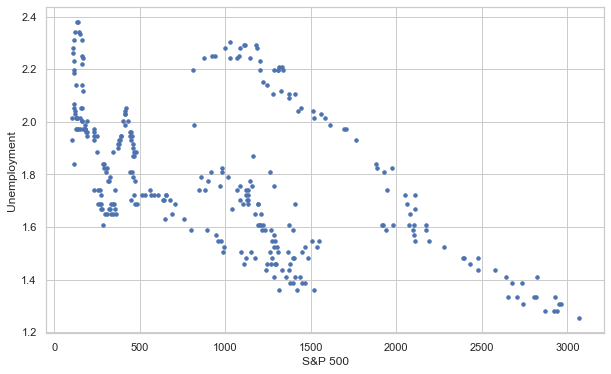

In [268]:
df = merged_df
xs = df['Adj Close']
ys = df['Unemployment'].apply(np.log)
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True, color='b')
plt.xlabel('S&P 500')
plt.ylabel('Unemployment')
plt.show();

This analysis shows that the index S&P500 and the Unemployment Rate have a negative correlation, which means that as one variable increases, the other variable decreases

# 2. Consumer Confidence Index

In [3]:
# S&P500 and Consumer Confidence Index 
sp500 = yf.download('^GSPC', start='2011-01-01')
cci = yf.download('CCI', start='2011-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Resample the data to a monthly frequency and calculate the percent change
sp500_monthly = sp500['Adj Close'].resample('M').ffill().pct_change()
cci_monthly = cci['Adj Close'].resample('M').ffill().pct_change()

# Calculate the Pearson correlation 
correlation_ссі = sp500_monthly.corr(cci_monthly).round(2)

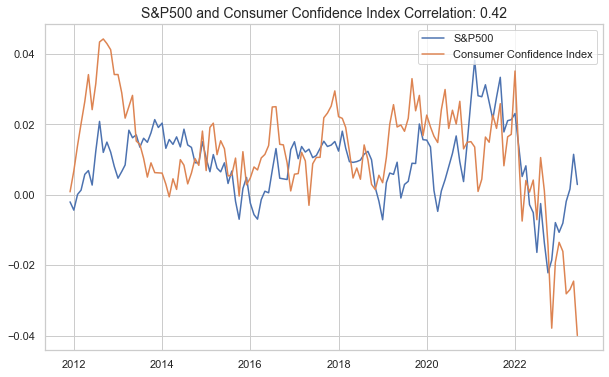

In [9]:
# Plot the data with rolling mean
window = 10
rolling_mean_sp = sp500_monthly.rolling(window=window).mean()
rolling_mean_cc = cci_monthly.rolling(window=window).mean()

plt.plot(rolling_mean_sp.index, rolling_mean_sp, label='S&P500')
plt.plot(rolling_mean_cc.index, rolling_mean_cc, label='Consumer Confidence Index')
plt.legend(loc='upper right')
plt.title(f'S&P500 and Consumer Confidence Index Correlation: {correlation_ссі}',fontsize=14)
plt.show();

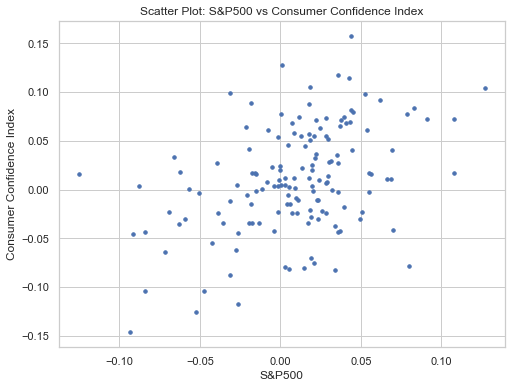

In [14]:
# Merge DataFrame 
data = pd.concat([sp500_monthly, cci_monthly], axis=1)
data.columns = ['S&P500', 'Consumer Confidence Index']

#Built scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data['S&P500'], data['Consumer Confidence Index'], s=12)
plt.xlabel('S&P500')
plt.ylabel('Consumer Confidence Index')
plt.title('Scatter Plot: S&P500 vs Consumer Confidence Index')
plt.grid(True)
plt.show() 

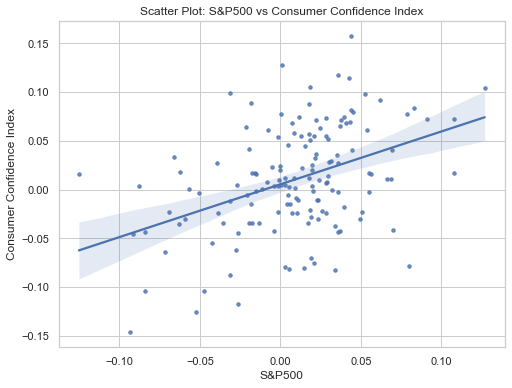

In [18]:
#Add trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='S&P500', y='Consumer Confidence Index', data=data, scatter_kws={'s': 12})
plt.xlabel('S&P500')
plt.ylabel('Consumer Confidence Index')
plt.title('Scatter Plot: S&P500 vs Consumer Confidence Index')

plt.show()

After conducting this analysis, we see that the index and the level of consumer sentiment have a positive correlation, which means that as one variable increases, the other variable also increases

# 3. Interest Rate

In [19]:
#^TNX and S&P500
tnx = yf.download('^TNX', start='2011-01-01')
sp500 = yf.download('^GSPC', start='2011-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
window = 20
rolling_mean_sp500 = sp500.rolling(window=window).mean()
rolling_mean_tnx = tnx.rolling(window=window).mean()

In [21]:
rolling_mean_sp500.reset_index(inplace=True)
rolling_mean_tnx.reset_index(inplace=True)

In [22]:
# Resample the data to a monthly frequency and calculate the percent change
sp500_monthly = sp500['Adj Close'].resample('M').ffill().pct_change()
tnx_monthly = tnx['Adj Close'].resample('M').ffill().pct_change()

# Calculate the Pearson correlation 
correlation_tnx = sp500_monthly.corr(tnx_monthly).round(2)
print(correlation_tnx)

0.15


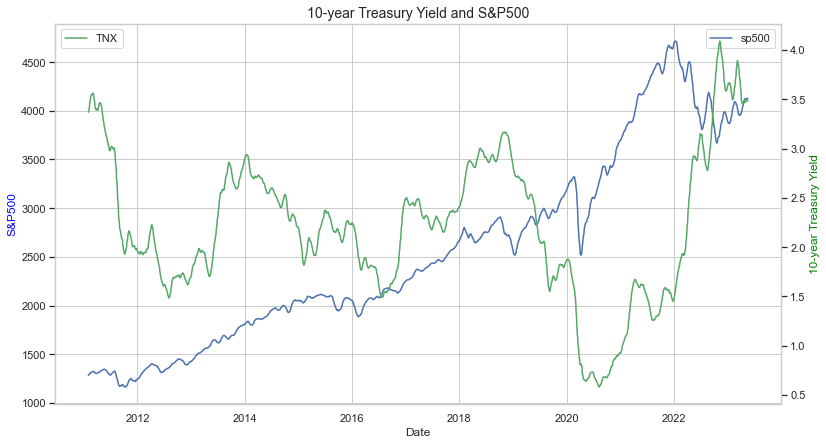

In [23]:
# Plot data with rolling mean and two ax
fig, ax = plt.subplots(figsize=(13, 7))

ax = sns.lineplot(data=rolling_mean_sp500, x=rolling_mean_sp500['Date'], 
                  y=rolling_mean_sp500['Adj Close'], color='b',label='sp500')
ax.set_ylabel('S&P500', color='blue')

ax2 = plt.twinx()
sns.lineplot(ax=ax2, data=rolling_mean_tnx, x=rolling_mean_tnx['Date'], 
             y=rolling_mean_tnx['Adj Close'], color="g",label='TNX')
ax2.set_ylabel('10-year Treasury Yield', color='green')

plt.title(f'10-year Treasury Yield and S&P500',fontsize=14)
plt.grid();

In [24]:
# Merge DataFrame
data = pd.concat([sp500_monthly, tnx_monthly], axis=1)
data.columns = ['S&P500', 'Interest Rate']

#Add trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='S&P500', y='Interest Rate', data=data, scatter_kws={'s': 12})
plt.xlabel('S&P500')
plt.ylabel('Interest Rate')
plt.title('Scatter Plot: S&P500 vs Interest Rate')

plt.show()

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

Despite the fact that the relationship between interest rates and the stock market is rather indirect, they tend to move in opposite directions. In many cases, when the Federal Reserve cuts interest rates, it causes the stock market to rise